In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("Output/testDataCombinedCaptureNewFeatureGenerated.csv")
corr_matrix = df.corr()

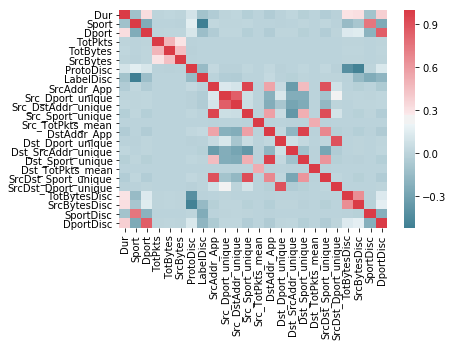

In [29]:
corr = corr_matrix
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [30]:
corr_matrix

,Dur,Sport,Dport,TotPkts,TotBytes,SrcBytes,ProtoDisc,LabelDisc,SrcAddr_App,Src_Dport_unique,Src_DstAddr_unique,Src_Sport_unique,Src_TotPkts_mean,DstAddr_App,Dst_Dport_unique,Dst_SrcAddr_unique,Dst_Sport_unique,Dst_TotPkts_mean,SrcDst_Sport_unique,SrcDst_Dport_unique,TotBytesDisc,SrcBytesDisc,SportDisc,DportDisc
Dur,1.000000,-0.114022,0.325578,0.009350,0.016854,0.008738,0.093916,-0.097889,-0.041727,0.008048,0.019251,-0.029867,-0.000014,-0.040280,-0.001612,0.021697,-0.021635,-0.000218,-0.033044,-0.010462,0.301138,0.320194,-0.101879,0.386103
Sport,-0.114022,1.000000,-0.240199,-0.000264,-0.001273,-0.002910,0.163662,-0.517143,0.024848,0.013085,0.013124,0.022032,0.000678,0.003486,-0.001829,-0.001018,0.010963,0.001059,0.019012,-0.002525,-0.144009,-0.083804,0.754680,-0.255521
Dport,0.325578,-0.240199,1.000000,0.006753,0.015764,0.010655,0.115285,-0.127858,-0.038083,0.022117,0.017227,-0.027913,0.000290,-0.038493,0.015190,0.012930,-0.022998,0.000483,-0.031708,0.008983,0.135828,0.148532,-0.194966,0.846212
TotPkts,0.009350,-0.000264,0.006753,1.000000,0.490572,0.305675,-0.005508,-0.000918,-0.000887,0.000140,0.000422,-0.000939,0.000024,0.000120,-0.000449,-0.000806,0.000112,-0.000009,-0.000956,-0.000171,0.005702,0.005861,0.000793,0.004632
TotBytes,0.016854,-0.001273,0.015764,0.490572,1.000000,0.449262,-0.009336,-0.001529,-0.001502,0.000458,0.000575,-0.001493,0.000074,-0.001241,-0.000623,-0.001137,-0.001097,-0.000013,-0.001425,-0.000284,0.010324,0.010617,0.000290,0.011235
SrcBytes,0.008738,-0.002910,0.010655,0.305675,0.449262,1.000000,-0.003459,0.000653,-0.000889,-0.000384,-0.000303,-0.000821,0.000006,-0.001077,-0.000346,-0.000307,-0.000942,-0.000002,-0.000654,-0.000128,0.006589,0.006816,-0.000927,0.008188
ProtoDisc,0.093916,0.163662,0.115285,-0.005508,-0.009336,-0.003459,1.000000,-0.144120,0.029352,-0.012764,-0.011227,0.019993,0.000211,0.027912,-0.012290,0.000176,0.018156,0.000618,0.025595,-0.009527,-0.414948,-0.498745,0.015077,0.123874
LabelDisc,-0.097889,-0.517143,-0.127858,-0.000918,-0.001529,0.000653,-0.144120,1.000000,0.004135,-0.033893,-0.037424,-0.001006,-0.000158,0.035899,-0.003253,-0.013711,0.008119,-0.000253,0.005435,0.005706,-0.007127,-0.154211,-0.241019,-0.180771
SrcAddr_App,-0.041727,0.024848,-0.038083,-0.000887,-0.001502,-0.000889,0.029352,0.004135,1.000000,0.129769,0.104380,0.955812,-0.001870,0.563294,0.041013,-0.338164,0.462844,-0.001250,0.899751,0.083302,-0.000664,-0.025116,0.004363,-0.049473
Src_Dport_unique,0.008048,0.013085,0.022117,0.000140,0.000458,-0.000384,-0.012764,-0.033893,0.129769,1.000000,0.850990,0.070581,0.001885,-0.212669,0.120575,-0.231479,-0.233889,0.000344,-0.091873,0.215316,0.006266,0.014074,0.010276,0.018246


In [23]:
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
       .stack()
       .sort_values(ascending=False))
sol

DstAddr_App          Dst_Sport_unique       0.968518
SrcAddr_App          Src_Sport_unique       0.955812
Src_Sport_unique     SrcDst_Sport_unique    0.918608
Dst_Dport_unique     SrcDst_Dport_unique    0.900245
SrcAddr_App          SrcDst_Sport_unique    0.899751
Src_Dport_unique     Src_DstAddr_unique     0.850990
Dport                DportDisc              0.846212
Sport                SportDisc              0.754680
DstAddr_App          SrcDst_Sport_unique    0.674274
TotBytesDisc         SrcBytesDisc           0.651206
Dst_Sport_unique     SrcDst_Sport_unique    0.621518
Src_Sport_unique     DstAddr_App            0.574392
SrcAddr_App          DstAddr_App            0.563294
Src_TotPkts_mean     Dst_TotPkts_mean       0.531152
Src_Sport_unique     Dst_Sport_unique       0.517544
TotPkts              TotBytes               0.490572
SrcAddr_App          Dst_Sport_unique       0.462844
TotBytes             SrcBytes               0.449262
Dur                  DportDisc              0.

In [8]:
df2 = df.drop(["StartTime", "SrcAddr", "DstAddr"], axis=1)
# PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(df2.values)

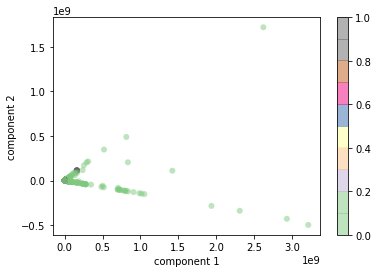

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df2.LabelDisc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();